In [2]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

OPENAQ_API_KEY = os.getenv("OPENAQ_API_KEY")



In [9]:
import requests

url = "https://api.openaq.org/v3/sensors/5077866/measurements"
headers = {
    "X-API-Key": OPENAQ_API_KEY
}

response = requests.get(url, headers=headers)


In [11]:
data = response.json()
data = data.get("results", [])
if not data:
    print("No data found for the specified sensor.")

In [14]:
data

[{'value': 7.0,
  'flagInfo': {'hasFlags': False},
  'parameter': {'id': 2,
   'name': 'pm25',
   'units': 'µg/m³',
   'displayName': None},
  'period': {'label': 'raw',
   'interval': '01:00:00',
   'datetimeFrom': {'utc': '2022-10-04T17:00:00Z',
    'local': '2022-10-04T13:00:00-04:00'},
   'datetimeTo': {'utc': '2022-10-04T18:00:00Z',
    'local': '2022-10-04T14:00:00-04:00'}},
  'coordinates': None,
  'summary': None,
  'coverage': {'expectedCount': 1,
   'expectedInterval': '01:00:00',
   'observedCount': 1,
   'observedInterval': '01:00:00',
   'percentComplete': 100.0,
   'percentCoverage': 100.0,
   'datetimeFrom': {'utc': '2022-10-04T17:00:00Z',
    'local': '2022-10-04T13:00:00-04:00'},
   'datetimeTo': {'utc': '2022-10-04T18:00:00Z',
    'local': '2022-10-04T14:00:00-04:00'}}},
 {'value': 7.0,
  'flagInfo': {'hasFlags': False},
  'parameter': {'id': 2,
   'name': 'pm25',
   'units': 'µg/m³',
   'displayName': None},
  'period': {'label': 'raw',
   'interval': '01:00:00',
   

In [21]:
cleaned = []
for point in data:
    cleaned.append({
        "value": point["value"],
        "datefrom": point["period"]["datetimeFrom"],
        "dateto": point["period"]["datetimeTo"]
    })

In [24]:
cleaned


[{'value': 7.0,
  'datefrom': {'utc': '2022-10-04T17:00:00Z',
   'local': '2022-10-04T13:00:00-04:00'},
  'dateto': {'utc': '2022-10-04T18:00:00Z',
   'local': '2022-10-04T14:00:00-04:00'}},
 {'value': 7.0,
  'datefrom': {'utc': '2022-10-04T18:00:00Z',
   'local': '2022-10-04T14:00:00-04:00'},
  'dateto': {'utc': '2022-10-04T19:00:00Z',
   'local': '2022-10-04T15:00:00-04:00'}},
 {'value': 6.0,
  'datefrom': {'utc': '2023-05-07T00:00:00Z',
   'local': '2023-05-06T20:00:00-04:00'},
  'dateto': {'utc': '2023-05-07T01:00:00Z',
   'local': '2023-05-06T21:00:00-04:00'}},
 {'value': 10.0,
  'datefrom': {'utc': '2023-05-07T01:00:00Z',
   'local': '2023-05-06T21:00:00-04:00'},
  'dateto': {'utc': '2023-05-07T02:00:00Z',
   'local': '2023-05-06T22:00:00-04:00'}},
 {'value': 12.0,
  'datefrom': {'utc': '2023-05-07T02:00:00Z',
   'local': '2023-05-06T22:00:00-04:00'},
  'dateto': {'utc': '2023-05-07T03:00:00Z',
   'local': '2023-05-06T23:00:00-04:00'}},
 {'value': 10.0,
  'datefrom': {'utc': '202

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame([
    {"date": pd.to_datetime(point["datefrom"]["utc"]), "value": point["value"]}
    for point in cleaned
])

# Sort by date
df = df.sort_values("date").iloc[2:]  
df



,date,value
2,2023-05-07 00:00:00+00:00,6.0
3,2023-05-07 01:00:00+00:00,10.0
4,2023-05-07 02:00:00+00:00,12.0
5,2023-05-07 03:00:00+00:00,10.0
6,2023-05-07 04:00:00+00:00,12.0
...,...,...
95,2023-05-10 23:00:00+00:00,9.0
96,2023-05-11 00:00:00+00:00,8.0
97,2023-05-11 01:00:00+00:00,12.0
98,2023-05-11 02:00:00+00:00,13.0


In [33]:
df

,date,value
2,2023-05-07 00:00:00+00:00,6.0
3,2023-05-07 01:00:00+00:00,10.0
4,2023-05-07 02:00:00+00:00,12.0
5,2023-05-07 03:00:00+00:00,10.0
6,2023-05-07 04:00:00+00:00,12.0
...,...,...
95,2023-05-10 23:00:00+00:00,9.0
96,2023-05-11 00:00:00+00:00,8.0
97,2023-05-11 01:00:00+00:00,12.0
98,2023-05-11 02:00:00+00:00,13.0


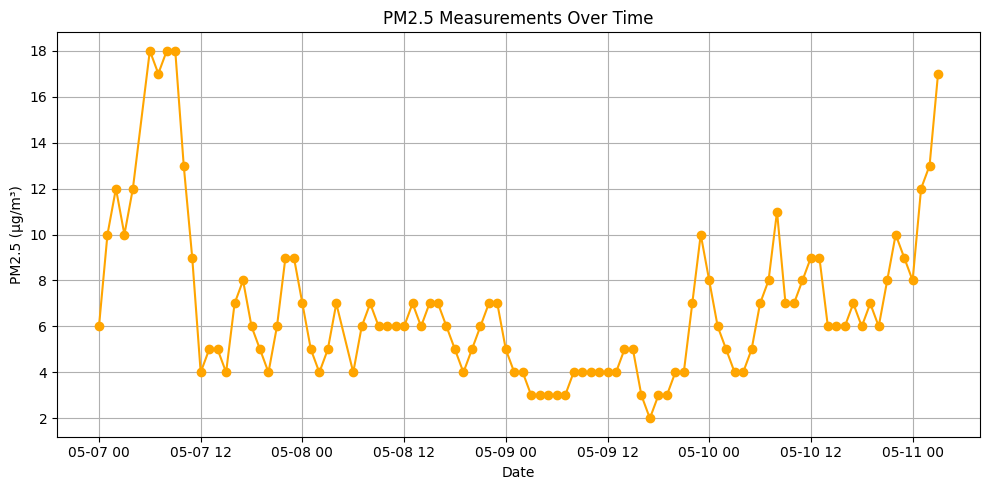

In [34]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["value"], marker='o', color='orange')
plt.title("PM2.5 Measurements Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()